In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Visualize the data using a scatter plot.  From the plot determine an appropriate value of k.

In [2]:
#Read the housing.csv file provided on elearning
data = pd.read_csv("C:/Users/user/Desktop/kmeans_dataset.csv")
data.head(5)

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [3]:
len(data)

3000

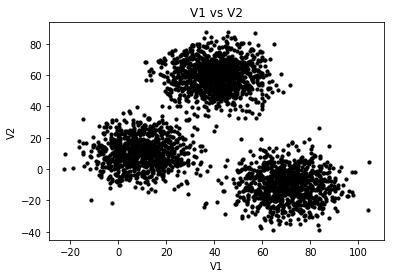

In [4]:
#Draw a scatter plot of the two variables
plt.scatter(data.V1, data.V2, s = 10, color = 'black')

plt.title('V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')

plt.show()

In [5]:
#The appropriate K value is therefore 3 due to the 3 clear clusters formed

### KMeans model from 1 - 10 + WSS calculation

In [6]:
# X = np.array(data.V1, data.V2).reshape(len(data.V1), 1)
X = np.array(list(zip(data.V1, data.V2))).reshape(len(data.V1), 2)

wss_list = []
wss = 0
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=300).fit(X)
    wss = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))
    wss_list.append(wss)
    print(k, '=>', wss)

#Explanation

#cdist(X, kmeanModel.cluster_centers_, 'euclidean') 
# cdist calculates the difference in distance between the two collective inputs in this case
# coordinates in X and the successive cluster centers from k = 1 to k = 10
# the second parameter passed is the metric used to calculate the difference i.e. eucledian for our case


#np.min(cdist(X, kmean_model.cluster_centers_, 'euclidean'), axis=1)
# The ouput of cdist is is an array for each of the differences between each X coordinate pair and the respective 
# cluster center, we therefore use np.min to get the desired difference of each X coordinate pair and its
# closest cluster center i.e. the cluster it belongs to

#sum(np.min(cdist(X, kmean_model.cluster_centers_, 'euclidean'), axis=1))
# We now get the sum totals for each eucledian distance between each X coordinate pair and its cluster center

1 => 118573.04301584774
2 => 74779.93285644594
3 => 38012.70271413337
4 => 35308.02302254213
5 => 32989.658489353395
6 => 30694.248556277784
7 => 28663.21466705382
8 => 26841.85221658458
9 => 25207.536838794902
10 => 24254.19895805311


### Use the value in above to determine the most suitable value for k using the elbow method

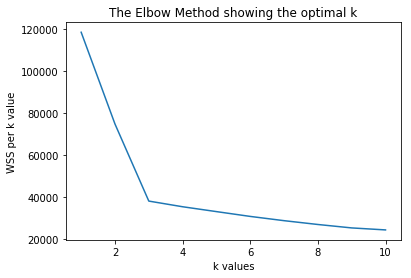

In [7]:
# Plot the elbow to determine best k value
plt.plot(K, wss_list)
plt.xlabel('k values')
plt.ylabel('WSS per k value')
plt.title('The Elbow Method showing the optimal k')

plt.show()

In [8]:
#The elbow is between 2 and 4 and therefore best k value = 3

### Use the k above to create a final kMeans model using the sklearn library

In [9]:
kmeans = KMeans(n_clusters=3, max_iter=300).fit(X)
print(kmeans.cluster_centers_)  

#Output is in the form of X,Y coordinates of the centroids

[[ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]]


### Visualize the clusters from above using a scatter plot. Ensure to show the clusters, their centroids and assignment of each point to a cluster. 

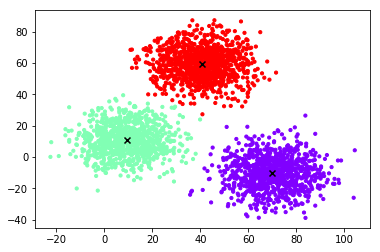

In [10]:
# Plot X values: first column of the X array against the second column
plt.scatter(X[:,0], X[:,1], s = 10, c=kmeans.labels_, cmap='rainbow')

#Plot centroids
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker='x') 

plt.show()